# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Display plots inline in Jupyter
%matplotlib inline

# For fetching stock data from Yahoo Finance
import yfinance as yf

# For date handling
from datetime import datetime

# For data consistency checks (optional but useful)
from pandas.testing import assert_frame_equal

print(" Libraries successfully imported.")


✅ Libraries successfully imported.


In [2]:

# Define list of tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up start and end dates for the data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data for each stock using yfinance
# Store each DataFrame as a variable (AAPL, GOOG, MSFT, AMZN)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end, progress=False)
    print(f"✅ Downloaded data for {stock}: {globals()[stock].shape[0]} rows")

# Optional: create a combined dataframe for later analysis
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, name in zip(company_list, company_name):
    company["Company"] = name

# Combine all data into one DataFrame
df = pd.concat(company_list, axis=0)
df.sort_index(inplace=True)

print("\n Combined DataFrame created with shape:", df.shape)
df.tail()


C:\Users\Shreyansh\AppData\Local\Temp\ipykernel_6240\78307992.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end, progress=False)


✅ Downloaded data for AAPL: 251 rows


C:\Users\Shreyansh\AppData\Local\Temp\ipykernel_6240\78307992.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end, progress=False)


✅ Downloaded data for GOOG: 251 rows


C:\Users\Shreyansh\AppData\Local\Temp\ipykernel_6240\78307992.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end, progress=False)


✅ Downloaded data for MSFT: 251 rows


C:\Users\Shreyansh\AppData\Local\Temp\ipykernel_6240\78307992.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end, progress=False)


✅ Downloaded data for AMZN: 251 rows

📈 Combined DataFrame created with shape: (1004, 21)


Price,Close,High,Low,Open,Volume,Company,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-12,273.470001,275.730011,271.700012,275.000000,48359700.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-13,NaN,NaN,NaN,NaN,NaN,GOOGLE,280.190002,283.51001,278.0,282.984985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-13,273.640106,276.699005,272.179993,274.269989,18125946.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-13,NaN,NaN,NaN,NaN,NaN,MICROSOFT,NaN,NaN,NaN,NaN,...,508.679993,513.5,505.450012,510.309998,7968276.0,NaN,NaN,NaN,NaN,NaN
2025-11-13,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,239.335007,243.729996,238.970001,243.100006,13054680.0


**Quick note:** 
- Using `globals()` is a sloppy way of setting the DataFrame names, but its simple
- Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sort_index(inplace=True)
df.tail(10)

Price,Close,High,Low,Open,Volume,Company,company_name,Close,High,Low,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-11,275.250000,275.910004,269.799988,269.809998,46208300.0,APPLE,APPLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-11,NaN,NaN,NaN,NaN,NaN,GOOGLE,GOOGLE,291.739990,292.339996,287.880005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-12,NaN,NaN,NaN,NaN,NaN,MICROSOFT,MICROSOFT,NaN,NaN,NaN,...,511.140015,511.670013,499.119995,509.359985,26547000.0,NaN,NaN,NaN,NaN,NaN
2025-11-12,NaN,NaN,NaN,NaN,NaN,AMAZON,AMAZON,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,244.199997,250.369995,243.750000,250.240005,31106500.0
2025-11-12,NaN,NaN,NaN,NaN,NaN,GOOGLE,GOOGLE,287.429993,292.359985,284.380005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-12,273.470001,275.730011,271.700012,275.000000,48359700.0,APPLE,APPLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-13,NaN,NaN,NaN,NaN,NaN,GOOGLE,GOOGLE,280.190002,283.510010,278.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-13,273.640106,276.699005,272.179993,274.269989,18125946.0,APPLE,APPLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Summary Stats
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,227.513820,229.865927,224.883515,227.188930,5.439111e+07
std,21.713369,21.346038,21.874377,21.695373,2.330963e+07
min,171.832428,189.691359,168.633375,171.364011,1.812595e+07
25%,209.573761,211.600520,207.471744,209.573763,4.085740e+07
50%,227.968948,230.576477,225.731175,227.699265,4.792370e+07
75%,243.701675,245.555299,240.895493,243.263993,5.709955e+07
max,275.250000,277.051436,272.179993,276.721738,1.843959e+08


In [5]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-11-13 to 2025-11-13
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    int64  
 5   (Company, )       251 non-null    object 
 6   (company_name, )  251 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 15.7+ KB


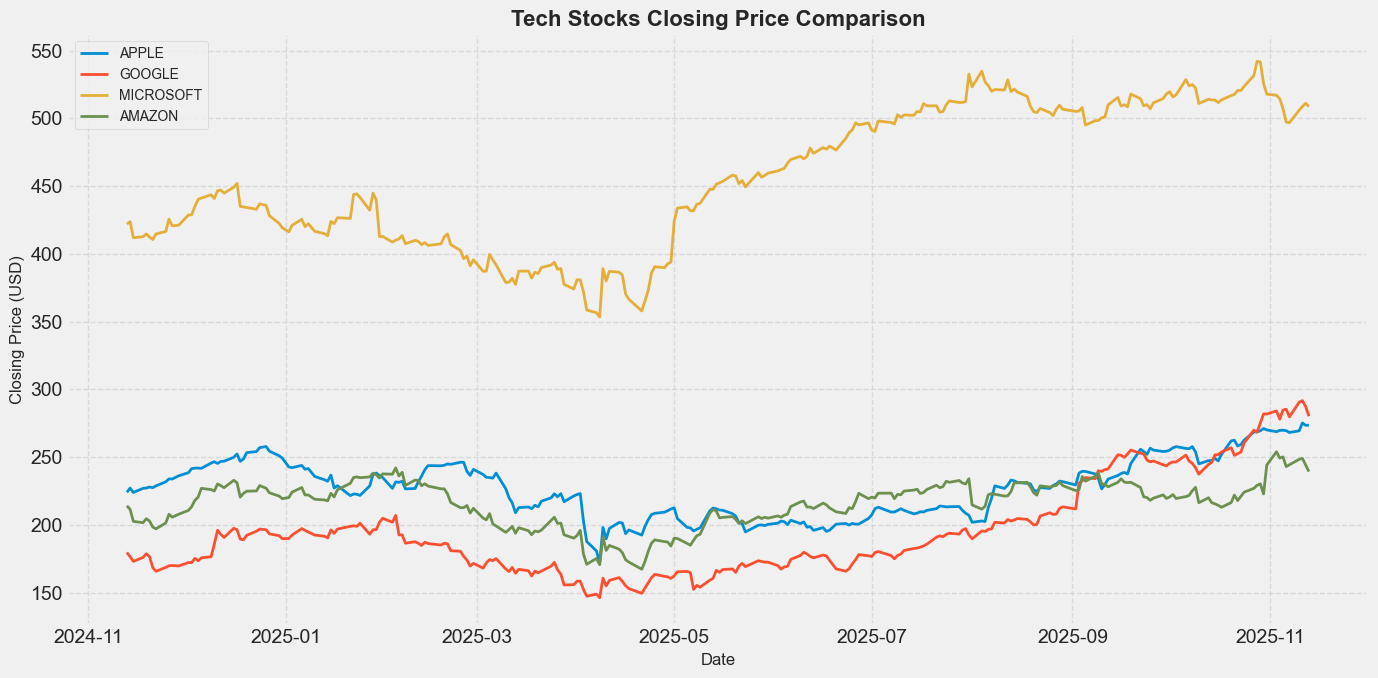

In [6]:
plt.figure(figsize=(14, 7))

for company, name in zip(company_list, company_name):
    # Flatten multi-index columns if necessary
    if isinstance(company.columns, pd.MultiIndex):
        company.columns = [col[0] if isinstance(col, tuple) else col for col in company.columns]

    # Pick correct price column
    price_col = "Adj Close" if "Adj Close" in company.columns else "Close"

    # Plot each company's closing price
    plt.plot(company.index, company[price_col], label=name, linewidth=2)

plt.title("Tech Stocks Closing Price Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


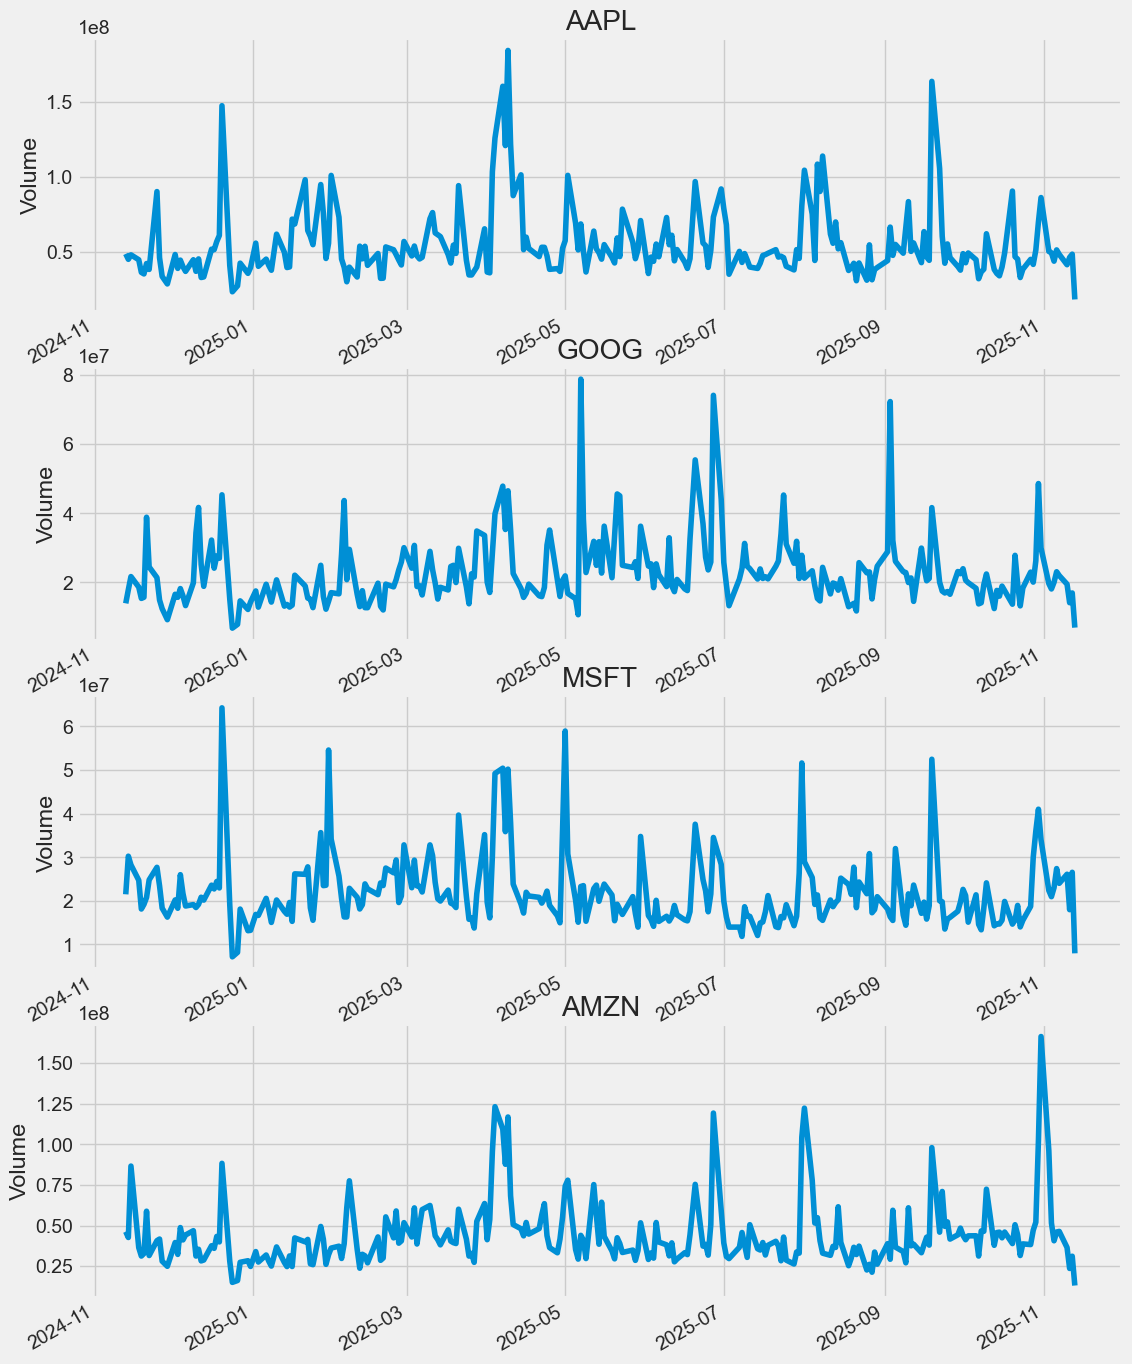

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [8]:
# ==========================================
#  MOVING AVERAGES (10, 20, 50 days)
# ==========================================

ma_day = [10, 20, 50]

for company, name in zip(company_list, company_name):
    # Flatten MultiIndex columns if present
    if isinstance(company.columns, pd.MultiIndex):
        company.columns = [col[0] if isinstance(col, tuple) else col for col in company.columns]
    
    # Identify the correct price column
    price_col = "Adj Close" if "Adj Close" in company.columns else "Close"

    # Compute moving averages
    for ma in ma_day:
        column_name = f"MA_{ma}_days"
        company[column_name] = company[price_col].rolling(ma).mean()

    print(f"✅ Added {ma_day} day moving averages for {name}")


✅ Added [10, 20, 50] day moving averages for APPLE
✅ Added [10, 20, 50] day moving averages for GOOGLE
✅ Added [10, 20, 50] day moving averages for MICROSOFT
✅ Added [10, 20, 50] day moving averages for AMAZON


In [9]:
print(GOOG.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Company', 'company_name',
       'MA_10_days', 'MA_20_days', 'MA_50_days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

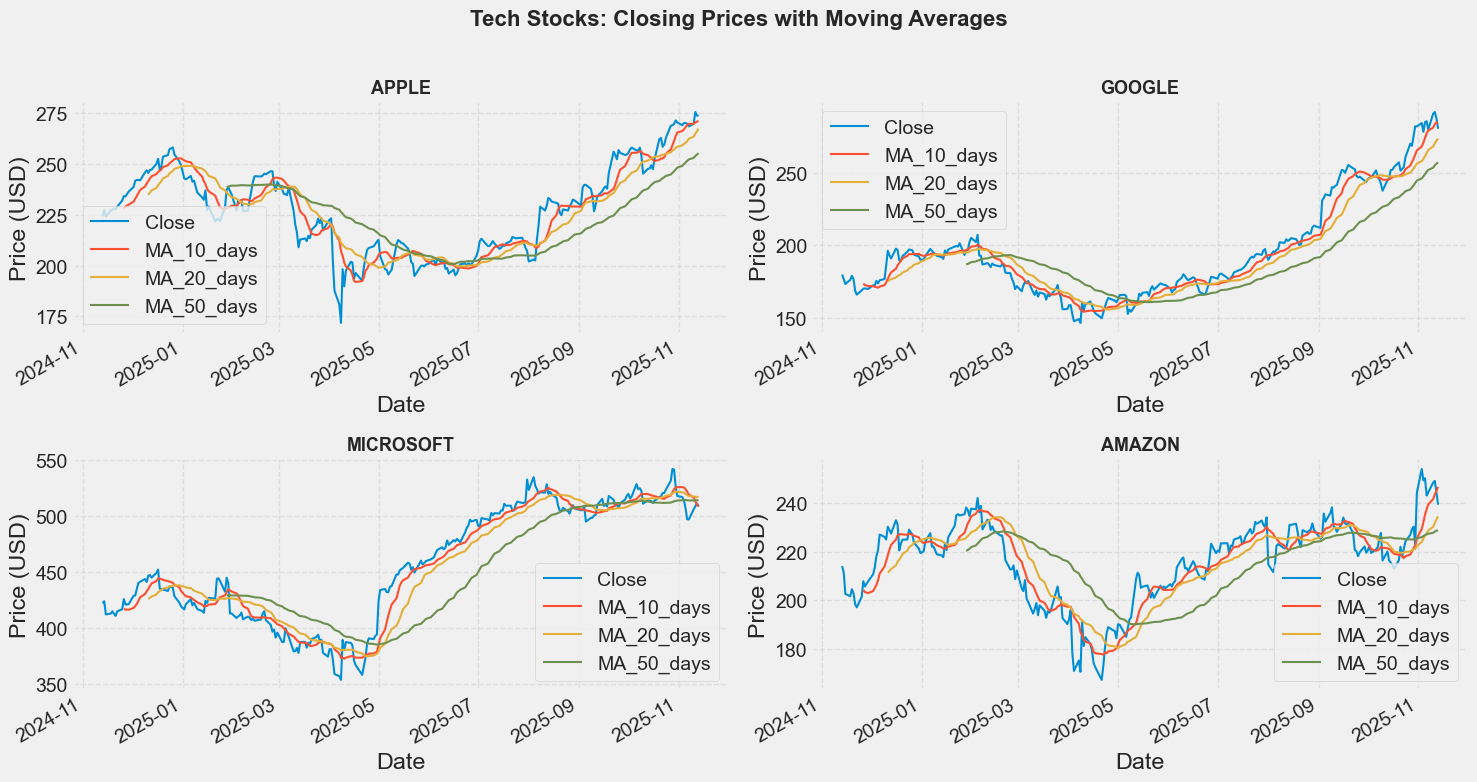

In [10]:
# ==========================================
#  MOVING AVERAGE PLOTS (4 Companies in Grid)
# ==========================================

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Pair each DataFrame with its subplot and name
companies = [(AAPL, "APPLE"), (GOOG, "GOOGLE"), (MSFT, "MICROSOFT"), (AMZN, "AMAZON")]

for ax, (company, name) in zip(axes.flat, companies):
    # Flatten columns if multi-indexed
    if isinstance(company.columns, pd.MultiIndex):
        company.columns = [col[0] if isinstance(col, tuple) else col for col in company.columns]
    
    # Detect the correct close column
    price_col = "Adj Close" if "Adj Close" in company.columns else "Close"
    
    # Detect the correct MA column names (in case they were created with underscores)
    ma_cols = [col for col in company.columns if "MA" in col]

    # Plot closing price + moving averages
    plot_cols = [price_col] + ma_cols
    company[plot_cols].plot(ax=ax, linewidth=1.5)

    ax.set_title(name, fontsize=13, fontweight="bold")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price (USD)")
    ax.grid(True, linestyle="--", alpha=0.5)

fig.suptitle("Tech Stocks: Closing Prices with Moving Averages", fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

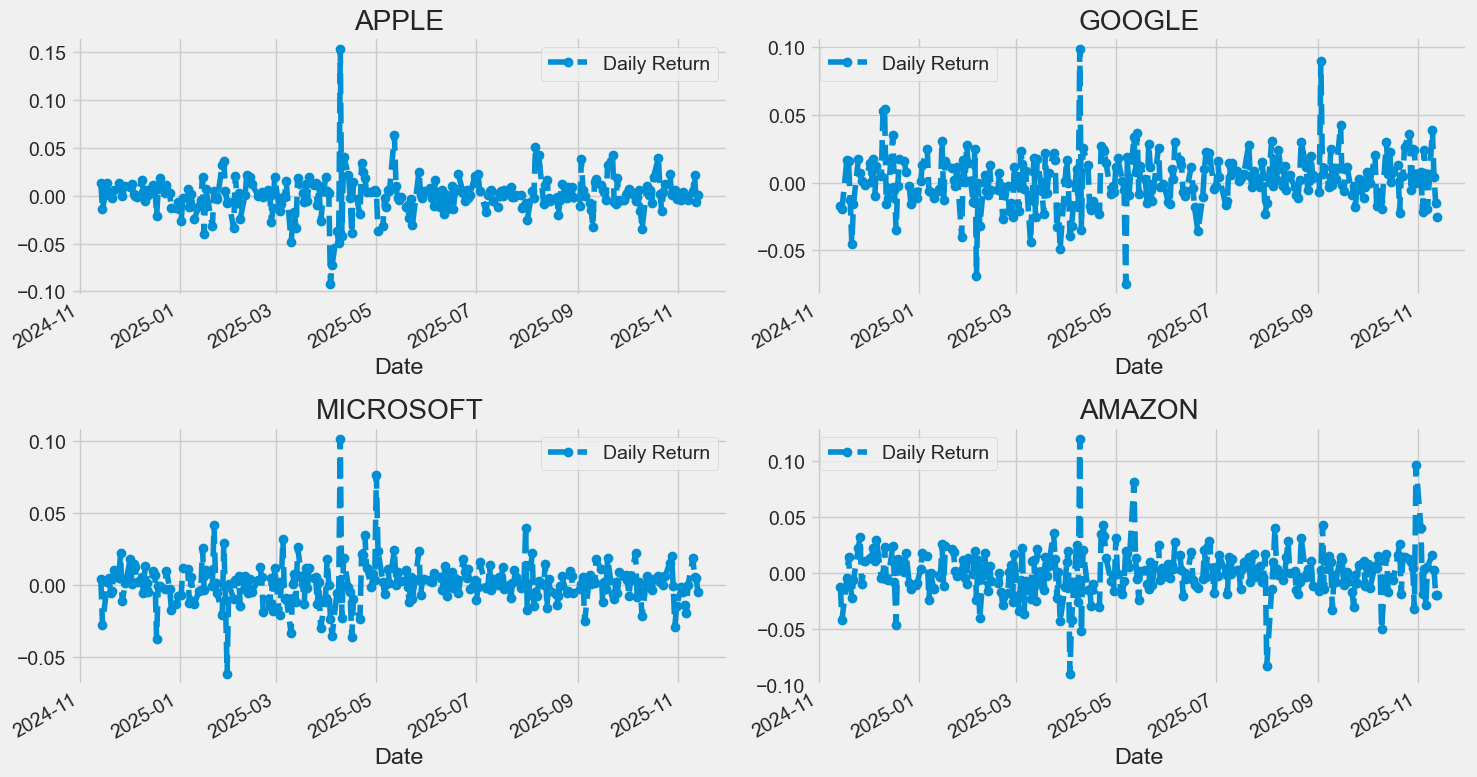

In [11]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\Shreyansh\AppData\Local\Temp\ipykernel_6240\586965654.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100)
C:\Users\Shreyansh\AppData\Local\Temp\ipykernel_6240\586965654.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'

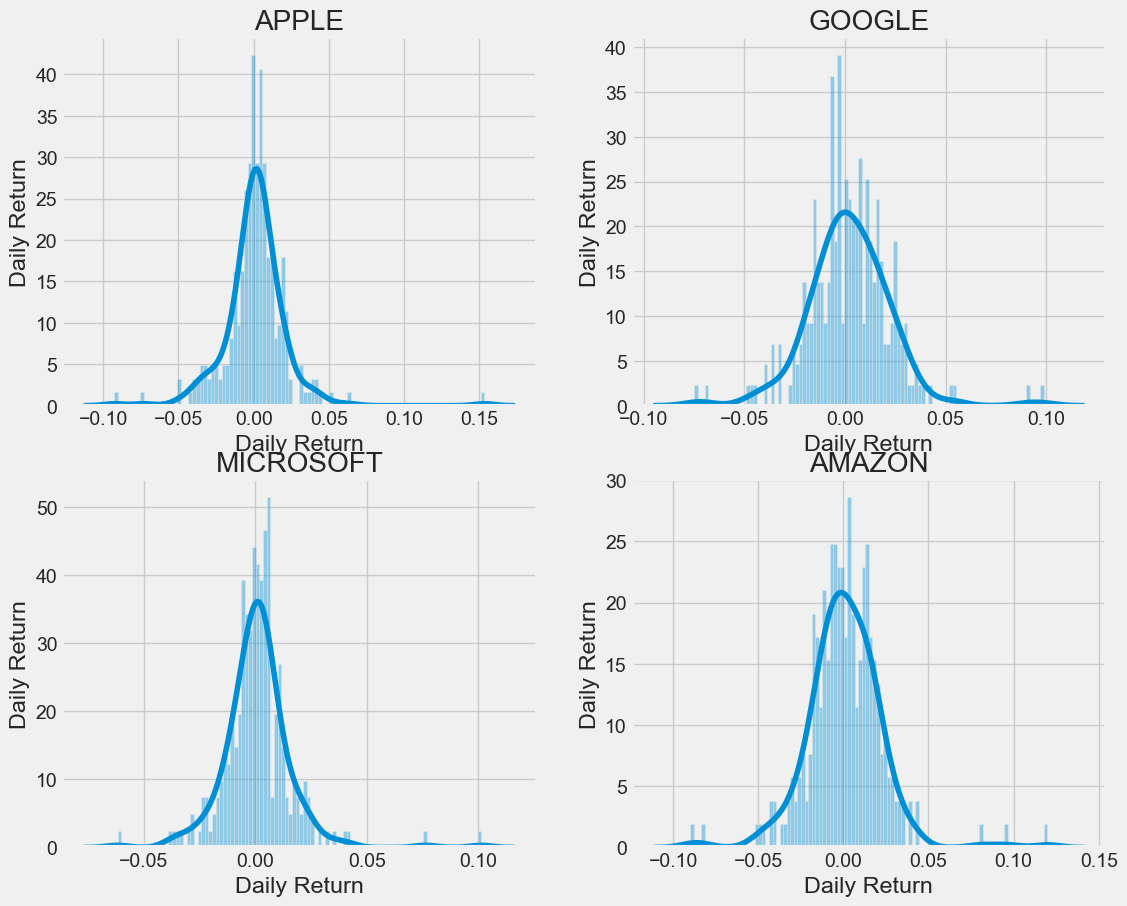

In [12]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

# Could have also done:
# AAPL['Daily Return'].hist()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [13]:
import yfinance as yf

# Download closing prices for all tech stocks
closing_df = yf.download(tech_list, start=start, end=end, auto_adjust=True, progress=False)["Close"]

# Let's take a quick look
closing_df.head()


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-11-13,224.106415,214.100006,179.703506,422.031586
2024-11-14,227.192474,211.479996,176.577179,423.709015
2024-11-15,223.986954,202.610001,173.132263,411.907593
2024-11-18,226.993362,201.699997,176.029572,412.661957
2024-11-19,227.252197,204.610001,178.797440,414.676819


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [14]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-11-13,NaN,NaN,NaN,NaN
2024-11-14,0.013771,-0.012237,-0.017397,0.003975
2024-11-15,-0.014109,-0.041942,-0.019509,-0.027853
2024-11-18,0.013422,-0.004491,0.016735,0.001831
2024-11-19,0.001140,0.014427,0.015724,0.004883


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

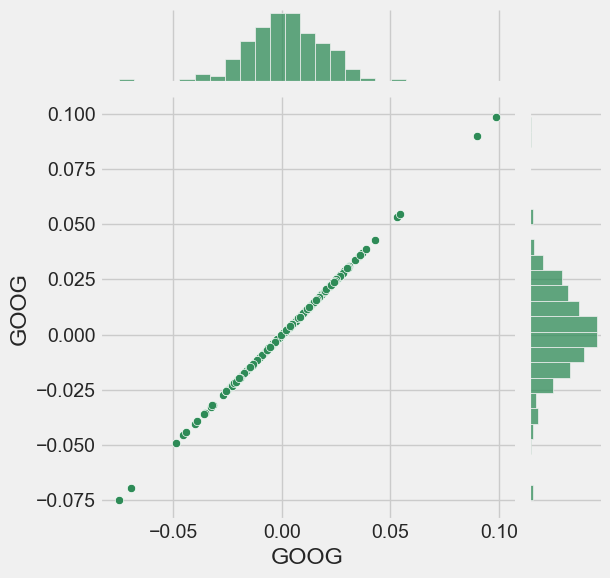

In [15]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


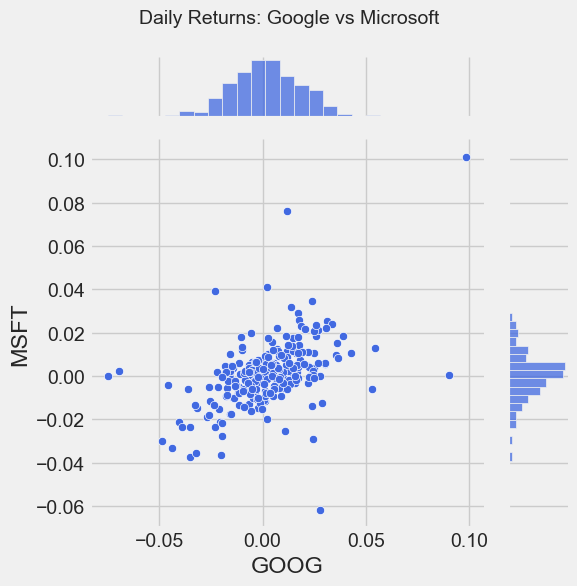

In [16]:
# Compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='royalblue', height=6)

plt.suptitle("Daily Returns: Google vs Microsoft", fontsize=14)
plt.tight_layout()
plt.show()


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

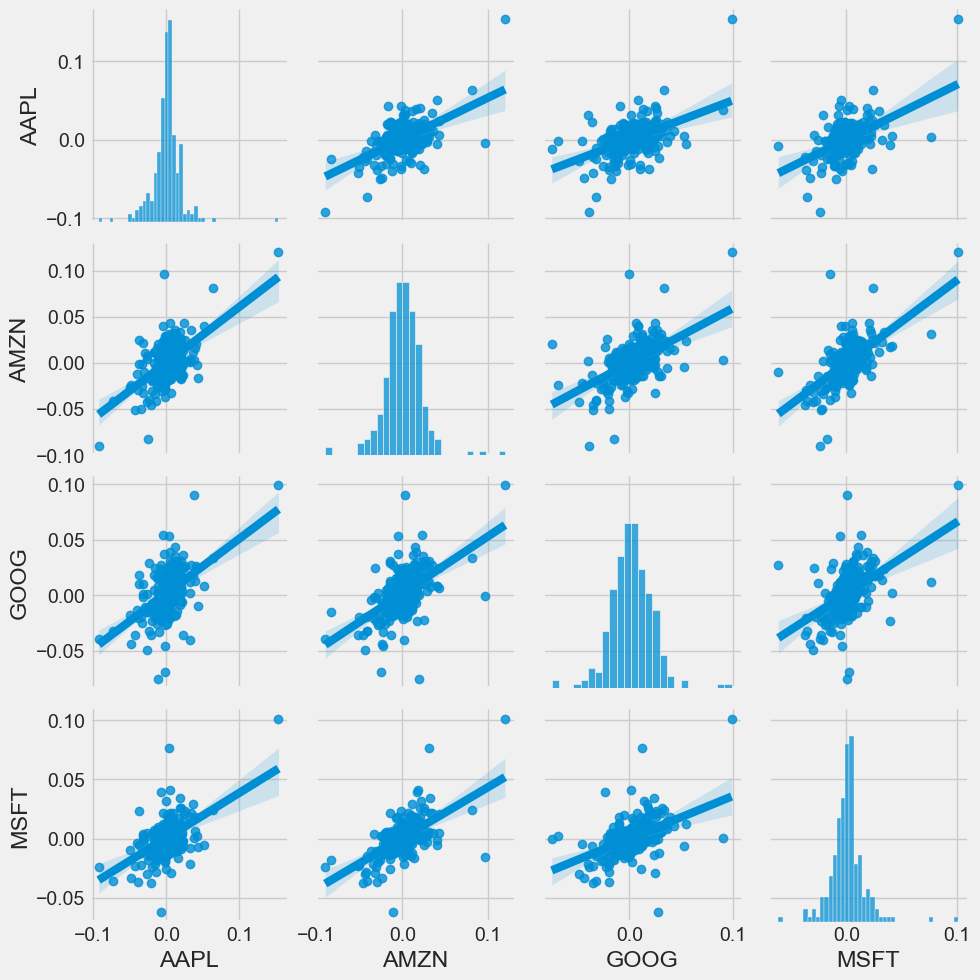

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

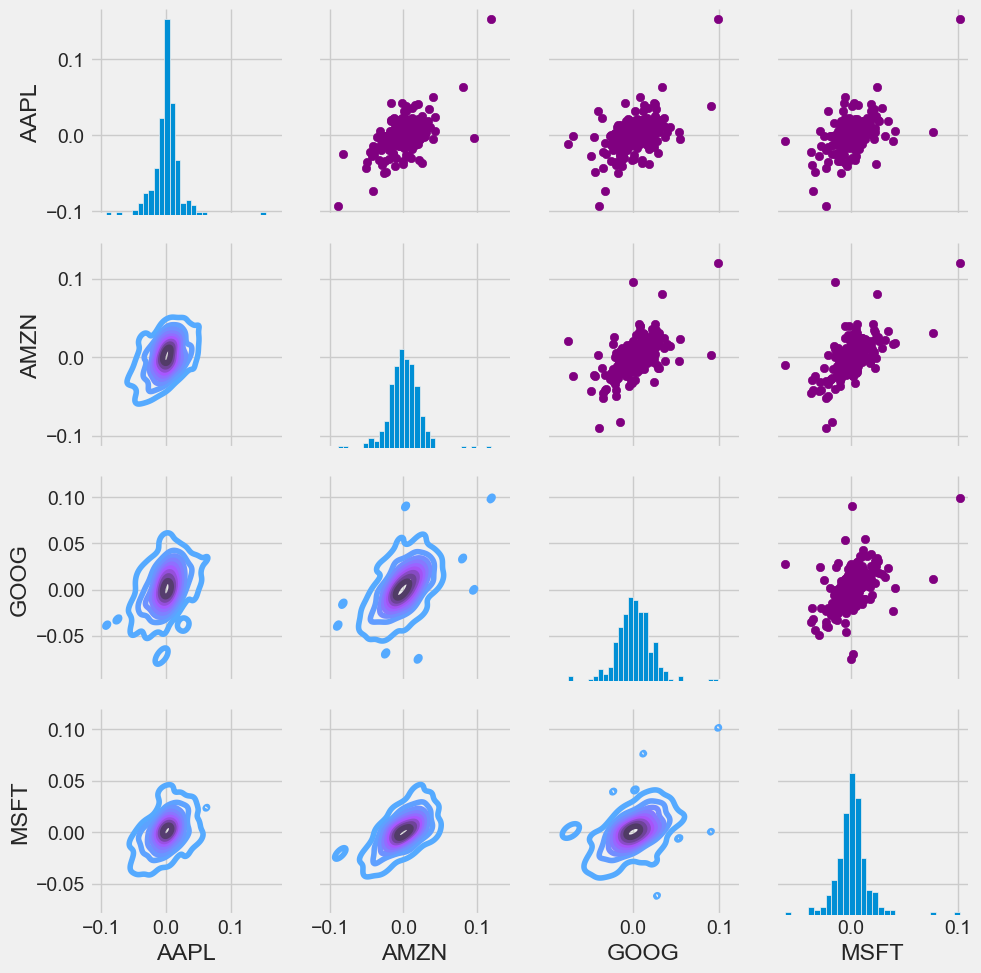

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

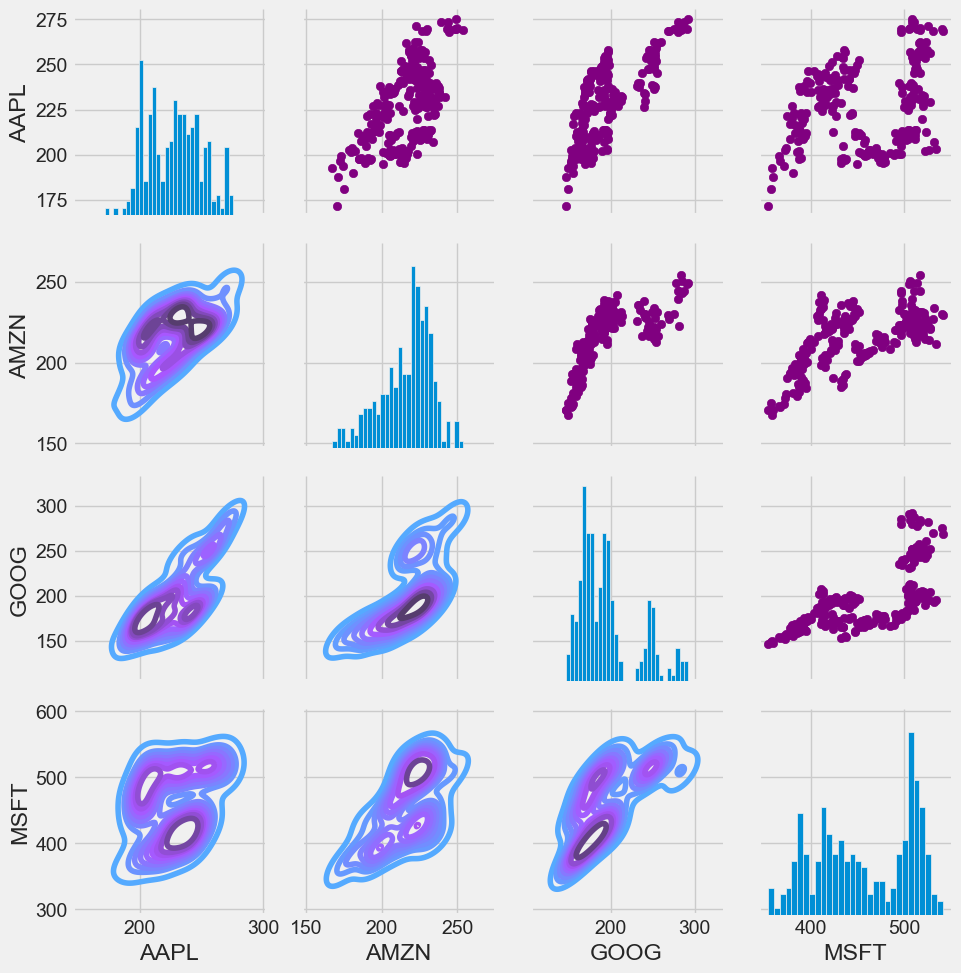

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<Axes: xlabel='Ticker', ylabel='Ticker'>

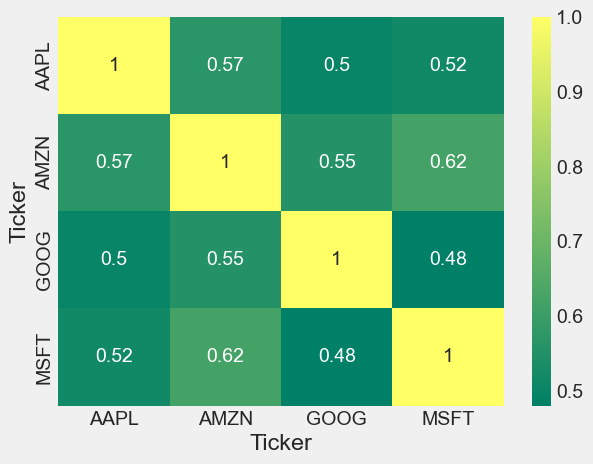

In [20]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<Axes: xlabel='Ticker', ylabel='Ticker'>

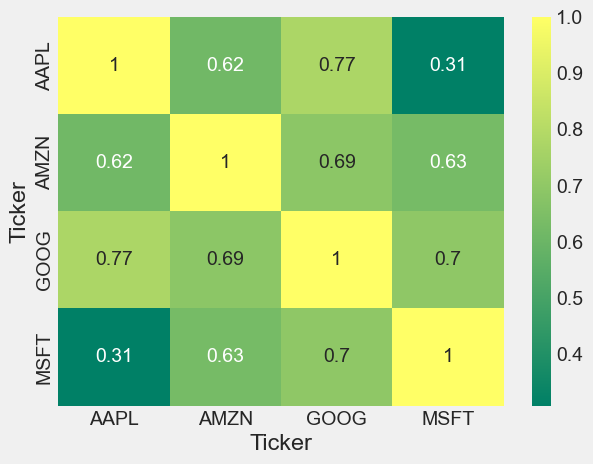

In [21]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# 5. Predicting the closing price stock price of APPLE inc:

In [23]:
import yfinance as yf
from datetime import datetime

# Define end date
end = datetime.now()

#  Get the stock quote from Yahoo Finance using yfinance
df = yf.download('AAPL', start='2012-01-01', end=end, auto_adjust=True, progress=False)

#  Show the data
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.333220,12.371310,12.266341,12.278338,302220800
2012-01-04,12.399498,12.436688,12.274736,12.296329,260022000
2012-01-05,12.537155,12.552750,12.376403,12.444783,271269600
2012-01-06,12.668218,12.678714,12.572846,12.589341,318292800
2012-01-09,12.648121,12.828667,12.636724,12.761188,394024400


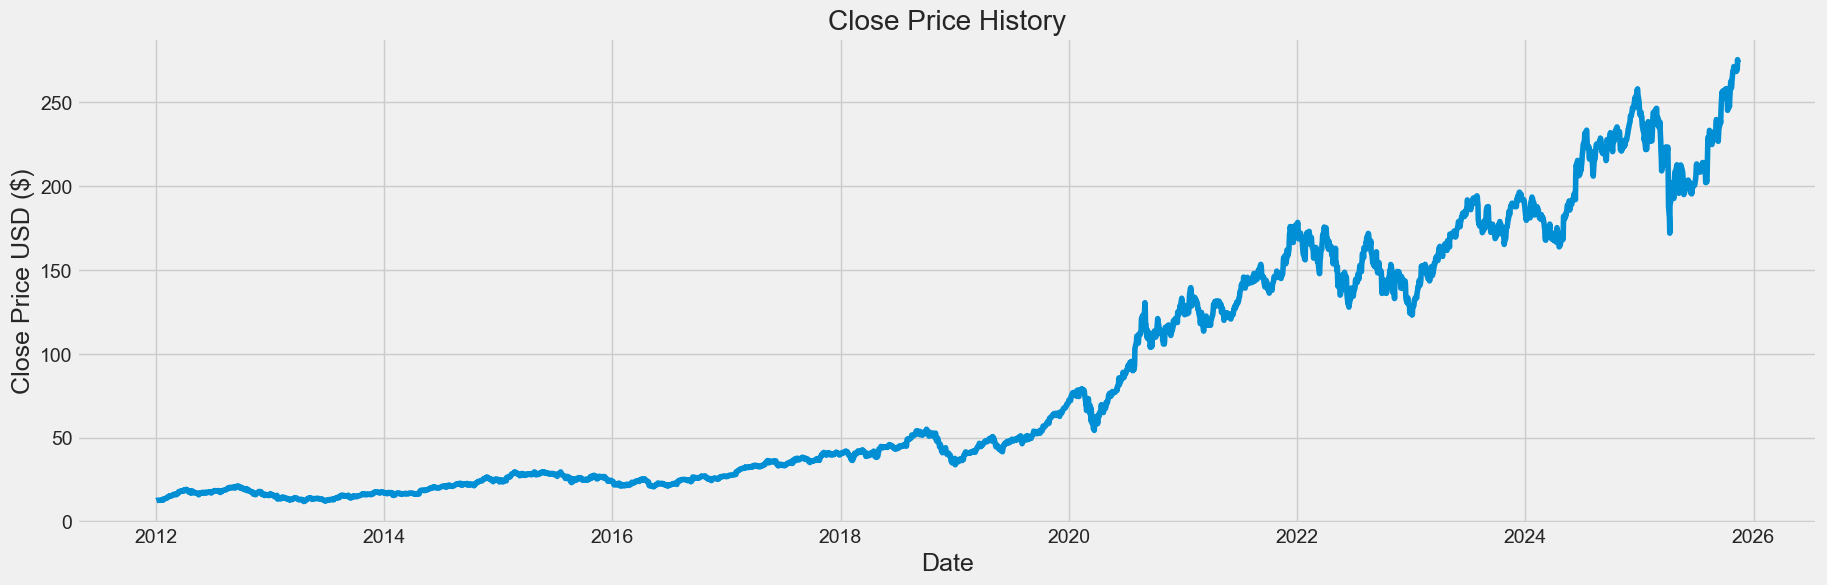

In [24]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [25]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

2791

In [26]:
# ==========================================
#  SCALE THE STOCK DATA (for ML models)
# ==========================================

from sklearn.preprocessing import MinMaxScaler

# Ensure your DataFrame has the right column
# Use 'Close' (since yfinance auto_adjust=True)
df = df.dropna()  # remove any missing values
dataset = df[['Close']].values  # use double brackets to get a 2D array

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(dataset)

#  Display shape and first few scaled values
print("Scaled data shape:", scaled_data.shape)
print("First 5 scaled values:\n", scaled_data[:5])


Scaled data shape: (3488, 1)
First 5 scaled values:
 [[0.00170082]
 [0.00195247]
 [0.00247516]
 [0.00297281]
 [0.0028965 ]]


In [27]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00170082, 0.00195247, 0.00247516, 0.00297281, 0.0028965 ,
       0.00306845, 0.00298989, 0.00285779, 0.00267787, 0.00323472,
       0.00373689, 0.00358204, 0.00273367, 0.00354331, 0.00274619,
       0.00573545, 0.00550429, 0.00580605, 0.00645855, 0.00685371,
       0.00682068, 0.00669884, 0.00721811, 0.00770666, 0.0082601 ,
       0.00915402, 0.01103185, 0.01106032, 0.0121057 , 0.0128869 ,
       0.01154429, 0.01206128, 0.01205105, 0.0135007 , 0.01329457,
       0.01367601, 0.01436159, 0.01474308, 0.01584199, 0.01664253,
       0.0168737 , 0.01695456, 0.01558575, 0.01525551, 0.0153045 ,
       0.01659129, 0.01695344, 0.01773121, 0.01956461, 0.02201066,
       0.02155287, 0.02155401, 0.02332254, 0.02387596, 0.02348194,
       0.02312208, 0.02274746, 0.02399212, 0.0248462 , 0.02520377])]
[0.02432010287563037]

[array([0.00170082, 0.00195247, 0.00247516, 0.00297281, 0.0028965 ,
       0.00306845, 0.00298989, 0.00285779, 0.00267787, 0.00323472,
       0.00373689, 0.00358204, 0.00

In [28]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2731, 60, 1)

In [30]:
!pip uninstall -y tensorflow tensorflow-intel tensorflow-cpu tensorflow-gpu keras keras-nightly keras-preprocessing keras-applications tensorflow-estimator tensorboard tensorflow-io-gcs-filesystem protobuf


Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
Found existing installation: tensorflow-intel 2.16.1
Uninstalling tensorflow-intel-2.16.1:
  Successfully uninstalled tensorflow-intel-2.16.1
Found existing installation: keras 3.12.0
Uninstalling keras-3.12.0:
  Successfully uninstalled keras-3.12.0
Found existing installation: tensorboard 2.16.2
Uninstalling tensorboard-2.16.2:
  Successfully uninstalled tensorboard-2.16.2
Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
  Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0
Found existing installation: protobuf 4.25.8
Uninstalling protobuf-4.25.8:
  Successfully uninstalled protobuf-4.25.8


You can safely remove it manually.


In [31]:
!pip cache purge


Files removed: 42 (386.7 MB)


In [32]:
!python -m pip install --upgrade pip setuptools wheel


In [33]:
!pip install tensorflow==2.16.1


   ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
   ---------------------------------------- 2.4/376.9 MB 14.9 MB/s eta 0:00:26
   ---------------------------------------- 2.9/376.9 MB 16.7 MB/s eta 0:00:23
   ---------------------------------------- 3.4/376.9 MB 5.8 MB/s eta 0:01:05
    --------------------------------------- 6.0/376.9 MB 8.4 MB/s eta 0:00:45
    --------------------------------------- 6.0/376.9 MB 8.4 MB/s eta 0:00:45
    --------------------------------------- 6.8/376.9 MB 5.5 MB/s eta 0:01:08
    --------------------------------------- 8.9/376.9 MB 6.5 MB/s eta 0:00:57
    --------------------------------------- 8.9/376.9 MB 6.5 MB/s eta 0:00:57
    --------------------------------------- 9.2/376.9 MB 5.1 MB/s eta 0:01:13
   - -------------------------------------- 10.5/376.9 MB 5.1 MB/s eta 0:01:13
   - -------------------------------------- 12.3/376.9 MB 5.4 MB/s eta 0:01:08
   - -------------------------------------- 13.6/376.9 MB 5.7 MB/s 

In [34]:
import tensorflow as tf
print(" TensorFlow version:", tf.__version__)
print("CUDA built:", tf.test.is_built_with_cuda())
print("GPUs:", tf.config.list_physical_devices('GPU'))


✅ TensorFlow version: 2.16.1
CUDA built: False
GPUs: []


In [35]:
# ==========================================
#  BUILD LSTM MODEL FOR STOCK PRICE PREDICTION
# ==========================================

# Import TensorFlow Keras (modern convention)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Show model summary
model.summary()


C:\Users\Shreyansh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2731/2731 ━━━━━━━━━━━━━━━━━━━━ 77s 27ms/step - loss: 5.7034e-04


In [38]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [39]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [40]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [41]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [42]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

11.062210902198707

In [43]:
print(df.columns)
df.head()

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.333220,12.371310,12.266341,12.278338,302220800
2012-01-04,12.399498,12.436688,12.274736,12.296329,260022000
2012-01-05,12.537155,12.552750,12.376403,12.444783,271269600
2012-01-06,12.668218,12.678714,12.572846,12.589341,318292800
2012-01-09,12.648121,12.828667,12.636724,12.761188,394024400


In [44]:
data = df.copy()

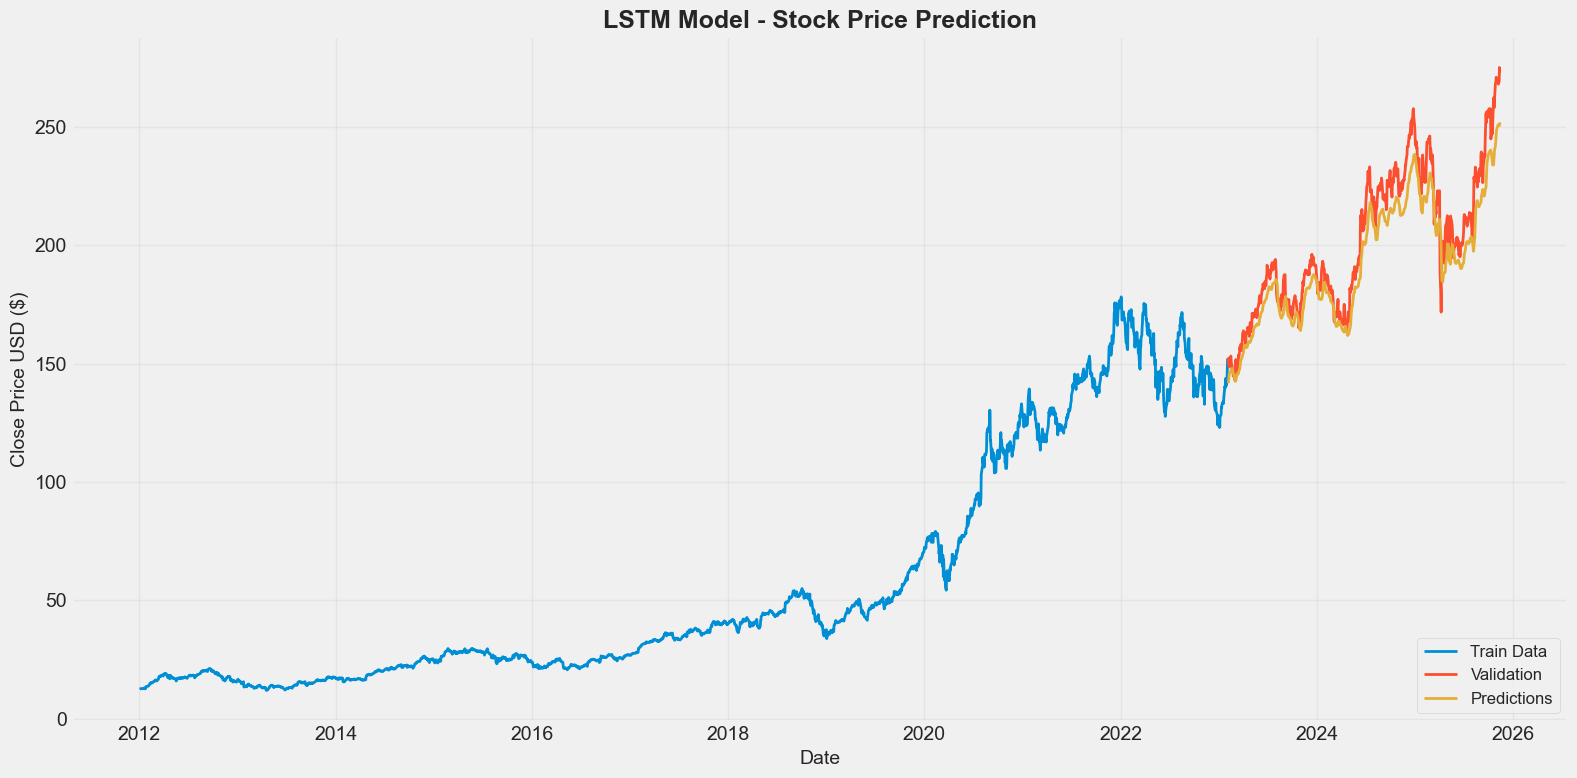

In [45]:
# ==========================================
#  PLOT LSTM MODEL PREDICTIONS (FINAL)
# ==========================================

import matplotlib.pyplot as plt

# Rebuild data references
data = df.copy()  # ensure data isn't empty
train = data[:training_data_len]
valid = data[training_data_len:].copy()

# Add predictions safely
valid.loc[:, 'Predictions'] = predictions

# Plot
plt.figure(figsize=(16,8))
plt.title('LSTM Model - Stock Price Prediction', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.plot(train['Close'], label='Train Data', linewidth=2)
plt.plot(valid[['Close', 'Predictions']], label=['Validation', 'Predictions'], linewidth=2)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [46]:
#Show the valid and predicted prices
valid

Price,Close,High,Low,Open,Volume,Predictions
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2023-02-06,149.474976,150.824625,148.539098,150.302503,69858300,141.794739
2023-02-07,152.351624,152.923006,148.401225,148.401225,83322600,143.213058
2023-02-08,149.662186,152.282657,148.923332,151.593063,64120100,144.674789
2023-02-09,148.627747,152.036330,148.184438,151.494501,56007100,145.606293
2023-02-10,148.992798,149.318392,147.226715,147.463515,57450700,146.040176
...,...,...,...,...,...,...
2025-11-07,268.209991,272.026299,266.511626,269.538690,48227400,250.990112
2025-11-10,269.429993,273.730011,267.459991,268.959991,41312400,250.792267
